In [31]:
from tensorflow.keras.layers import Input, Dense, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.optimizers import Adam #since we want to modify our leaning rate for our optimizer so functional API call

#ENCODER MODEL

In [76]:
# The input is 784 instead of 28x28 because we are using dense layers instead of CNN. So a vector is expected instead of a matrix
encoder_input = Input(shape=(784), name="encoder_input")

In [77]:
#The encoder
encoder_dense_layer1 = Dense(units=500, name="encoder_dense_1")(encoder_input)
encoder_activ_layer1 = LeakyReLU(name="encoder_leakyrelu_1")(encoder_dense_layer1)

encoder_dense_layer2 = Dense(units=2, name="encoder_dense_2")(encoder_activ_layer1)
encoder_output = LeakyReLU(name="encoder_output")(encoder_dense_layer2)

In [78]:
encoder = Model(x, encoder_output, name="encoder_model")

In [79]:
#The parameters in the encoder model
encoder.summary()

Model: "encoder_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_dense_1 (Dense)      (None, 500)               392500    
_________________________________________________________________
encoder_leakyrelu_1 (LeakyRe (None, 500)               0         
_________________________________________________________________
encoder_dense_2 (Dense)      (None, 2)                 1002      
_________________________________________________________________
encoder_output (LeakyReLU)   (None, 2)                 0         
Total params: 393,502
Trainable params: 393,502
Non-trainable params: 0
_________________________________________________________________


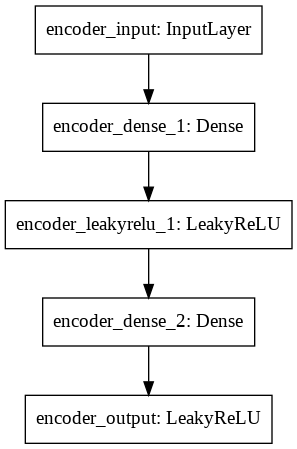

In [80]:
#Model structure
plot_model(encoder)

#DECODER MODEL

In [81]:
#Decoder Input
decoder_input = Input(shape=(2,),name="decoder_input")

In [82]:
#The decoder
decoder_dense_layer1 = Dense(units=500, name="decoder_dense_1")(decoder_input)
decoder_activ_layer1 = LeakyReLU(name="decoder_leakyrelu_1")(decoder_dense_layer1)

decoder_dense_layer2 = Dense(units=784, name="decoder_dense_2")(decoder_activ_layer1) #We want to get the orginal vector back
decoder_output = LeakyReLU(name="decoder_output")(decoder_dense_layer2)

In [83]:
decoder = Model(decoder_input,decoder_output,name="Decoder")

In [84]:
#The decoder model parameters
decoder.summary()

Model: "Decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
decoder_input (InputLayer)   [(None, 2)]               0         
_________________________________________________________________
decoder_dense_1 (Dense)      (None, 500)               1500      
_________________________________________________________________
decoder_leakyrelu_1 (LeakyRe (None, 500)               0         
_________________________________________________________________
decoder_dense_2 (Dense)      (None, 784)               392784    
_________________________________________________________________
decoder_output (LeakyReLU)   (None, 784)               0         
Total params: 394,284
Trainable params: 394,284
Non-trainable params: 0
_________________________________________________________________


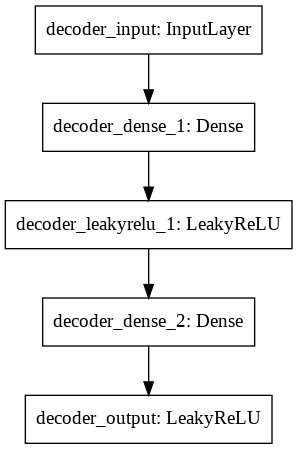

In [85]:
#Decoder model
plot_model(decoder)

#The Complete AutoEncoder Model

In [86]:
AutoEncoder_output = decoder(encoder(encoder_input))

In [87]:
#The autoencoder model
AutoEncoder = Model(encoder_input,AutoEncoder_output,name="Autoencoder")

In [88]:
#Autoencoder parameters
AutoEncoder.summary()

Model: "Autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_input (InputLayer)   [(None, 784)]             0         
_________________________________________________________________
encoder_model (Functional)   (None, 2)                 393502    
_________________________________________________________________
Decoder (Functional)         (None, 784)               394284    
Total params: 787,786
Trainable params: 787,786
Non-trainable params: 0
_________________________________________________________________


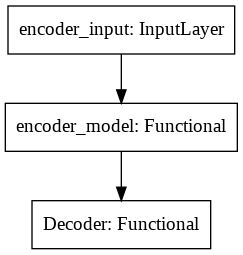

In [89]:
#Autoencoder layers
plot_model(AutoEncoder)

### Compiling the autoencoder model

In [90]:
AutoEncoder.compile(optimizer=Adam(learning_rate=0.0005),loss='mse')

# Loading the data

In [91]:
from tensorflow.keras.datasets.mnist import load_data #we used the mnist dataset
import numpy as np

In [92]:
(x_train_orig,y_train),(x_test_orig,y_test) = load_data() #downloading the data

In [93]:
x_train_orig.shape, x_test_orig.shape

((60000, 28, 28), (10000, 28, 28))

In [94]:
#Normalising the pixels of the images
x_train_orig = x_train_orig.astype('float32')/255.0
x_test_orig = x_test_orig.astype('float32')/255.0

In [95]:
#Since the images are in a matrix so converting them into a vector
x_train = x_train_orig.reshape((x_train_orig.shape[0],np.prod(x_train_orig.shape[1:])))
x_test = x_test_orig.reshape((x_test_orig.shape[0],np.prod(x_test_orig.shape[1:])))

In [96]:
#new shapes
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [97]:
#Now that our data is in vector order, we provide it as an input and train our model

#The labels y have not been given because we don't need that
AutoEncoder.fit(x_train,x_train,batch_size=256,epochs=20,shuffle=True,validation_data=(x_test,x_test),verbose = 1)

Epoch 1/20
235/235 [==============================] - 2s 6ms/step - loss: 0.0596 - val_loss: 0.0551
Epoch 2/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0544 - val_loss: 0.0533
Epoch 3/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0530 - val_loss: 0.0520
Epoch 4/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0518 - val_loss: 0.0509
Epoch 5/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0508 - val_loss: 0.0502
Epoch 6/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0500 - val_loss: 0.0494
Epoch 7/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0493 - val_loss: 0.0489
Epoch 8/20
235/235 [==============================] - 2s 7ms/step - loss: 0.0488 - val_loss: 0.0486
Epoch 9/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0483 - val_loss: 0.0480
Epoch 10/20
235/235 [==============================] - 1s 6ms/step - loss: 0.0480 - val_loss: 0.0478

## Predicting using Encoder and Decoder independently

In [98]:
#Now we predict first using the encoder model to get a vector of 2 latent features
encoder_prediction = encoder.predict(x_train)

In [99]:
#Predciting the decoder output using the output of the encoder which generates an image vector of 784 
decoder_prediction = decoder.predict(encoder_prediction)

In [100]:
#Converting the image vector to a matrix
decoder_images =  decoder_prediction.reshape((decoder_prediction.shape[0],28,28))

In [101]:
import matplotlib

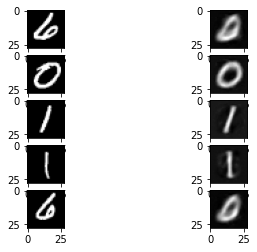

In [102]:
#Plotting the output
num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(decoder_images[rand_ind, :, :], cmap="gray")

### Note: The quality of images can be improved by using more neurons and by using CNNs

### Encoder Model cluster based output

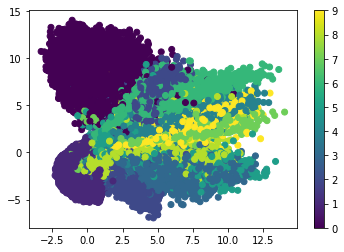

In [107]:
matplotlib.pyplot.figure()
matplotlib.pyplot.scatter(encoder_prediction[:, 0], encoder_prediction[:, 1], c=y_train) 
matplotlib.pyplot.colorbar()

## Predicting using complete Model

In [104]:
#Predicitng using the Overall Model
#Since we want to generate the images themselevs, so we predict on x_train again
autoencoder_output_vector = AutoEncoder.predict(x_train)

In [105]:
#Converting vector to matrix
autoencoder_images = autoencoder_output_vector.reshape((autoencoder_output_vector.shape[0],28,28))

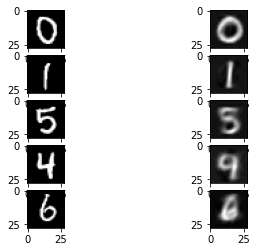

In [106]:
#Plotting these images
num_images_to_show = 5
for im_ind in range(num_images_to_show):
    plot_ind = im_ind*2 + 1
    rand_ind = np.random.randint(low=0, high=x_train.shape[0])
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind)
    matplotlib.pyplot.imshow(x_train_orig[rand_ind, :, :], cmap="gray")
    matplotlib.pyplot.subplot(num_images_to_show, 2, plot_ind+1)
    matplotlib.pyplot.imshow(autoencoder_images[rand_ind, :, :], cmap="gray")